<a href="https://colab.research.google.com/github/Sairaj-97/Machine-Learning/blob/main/Logistic_Regresssion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

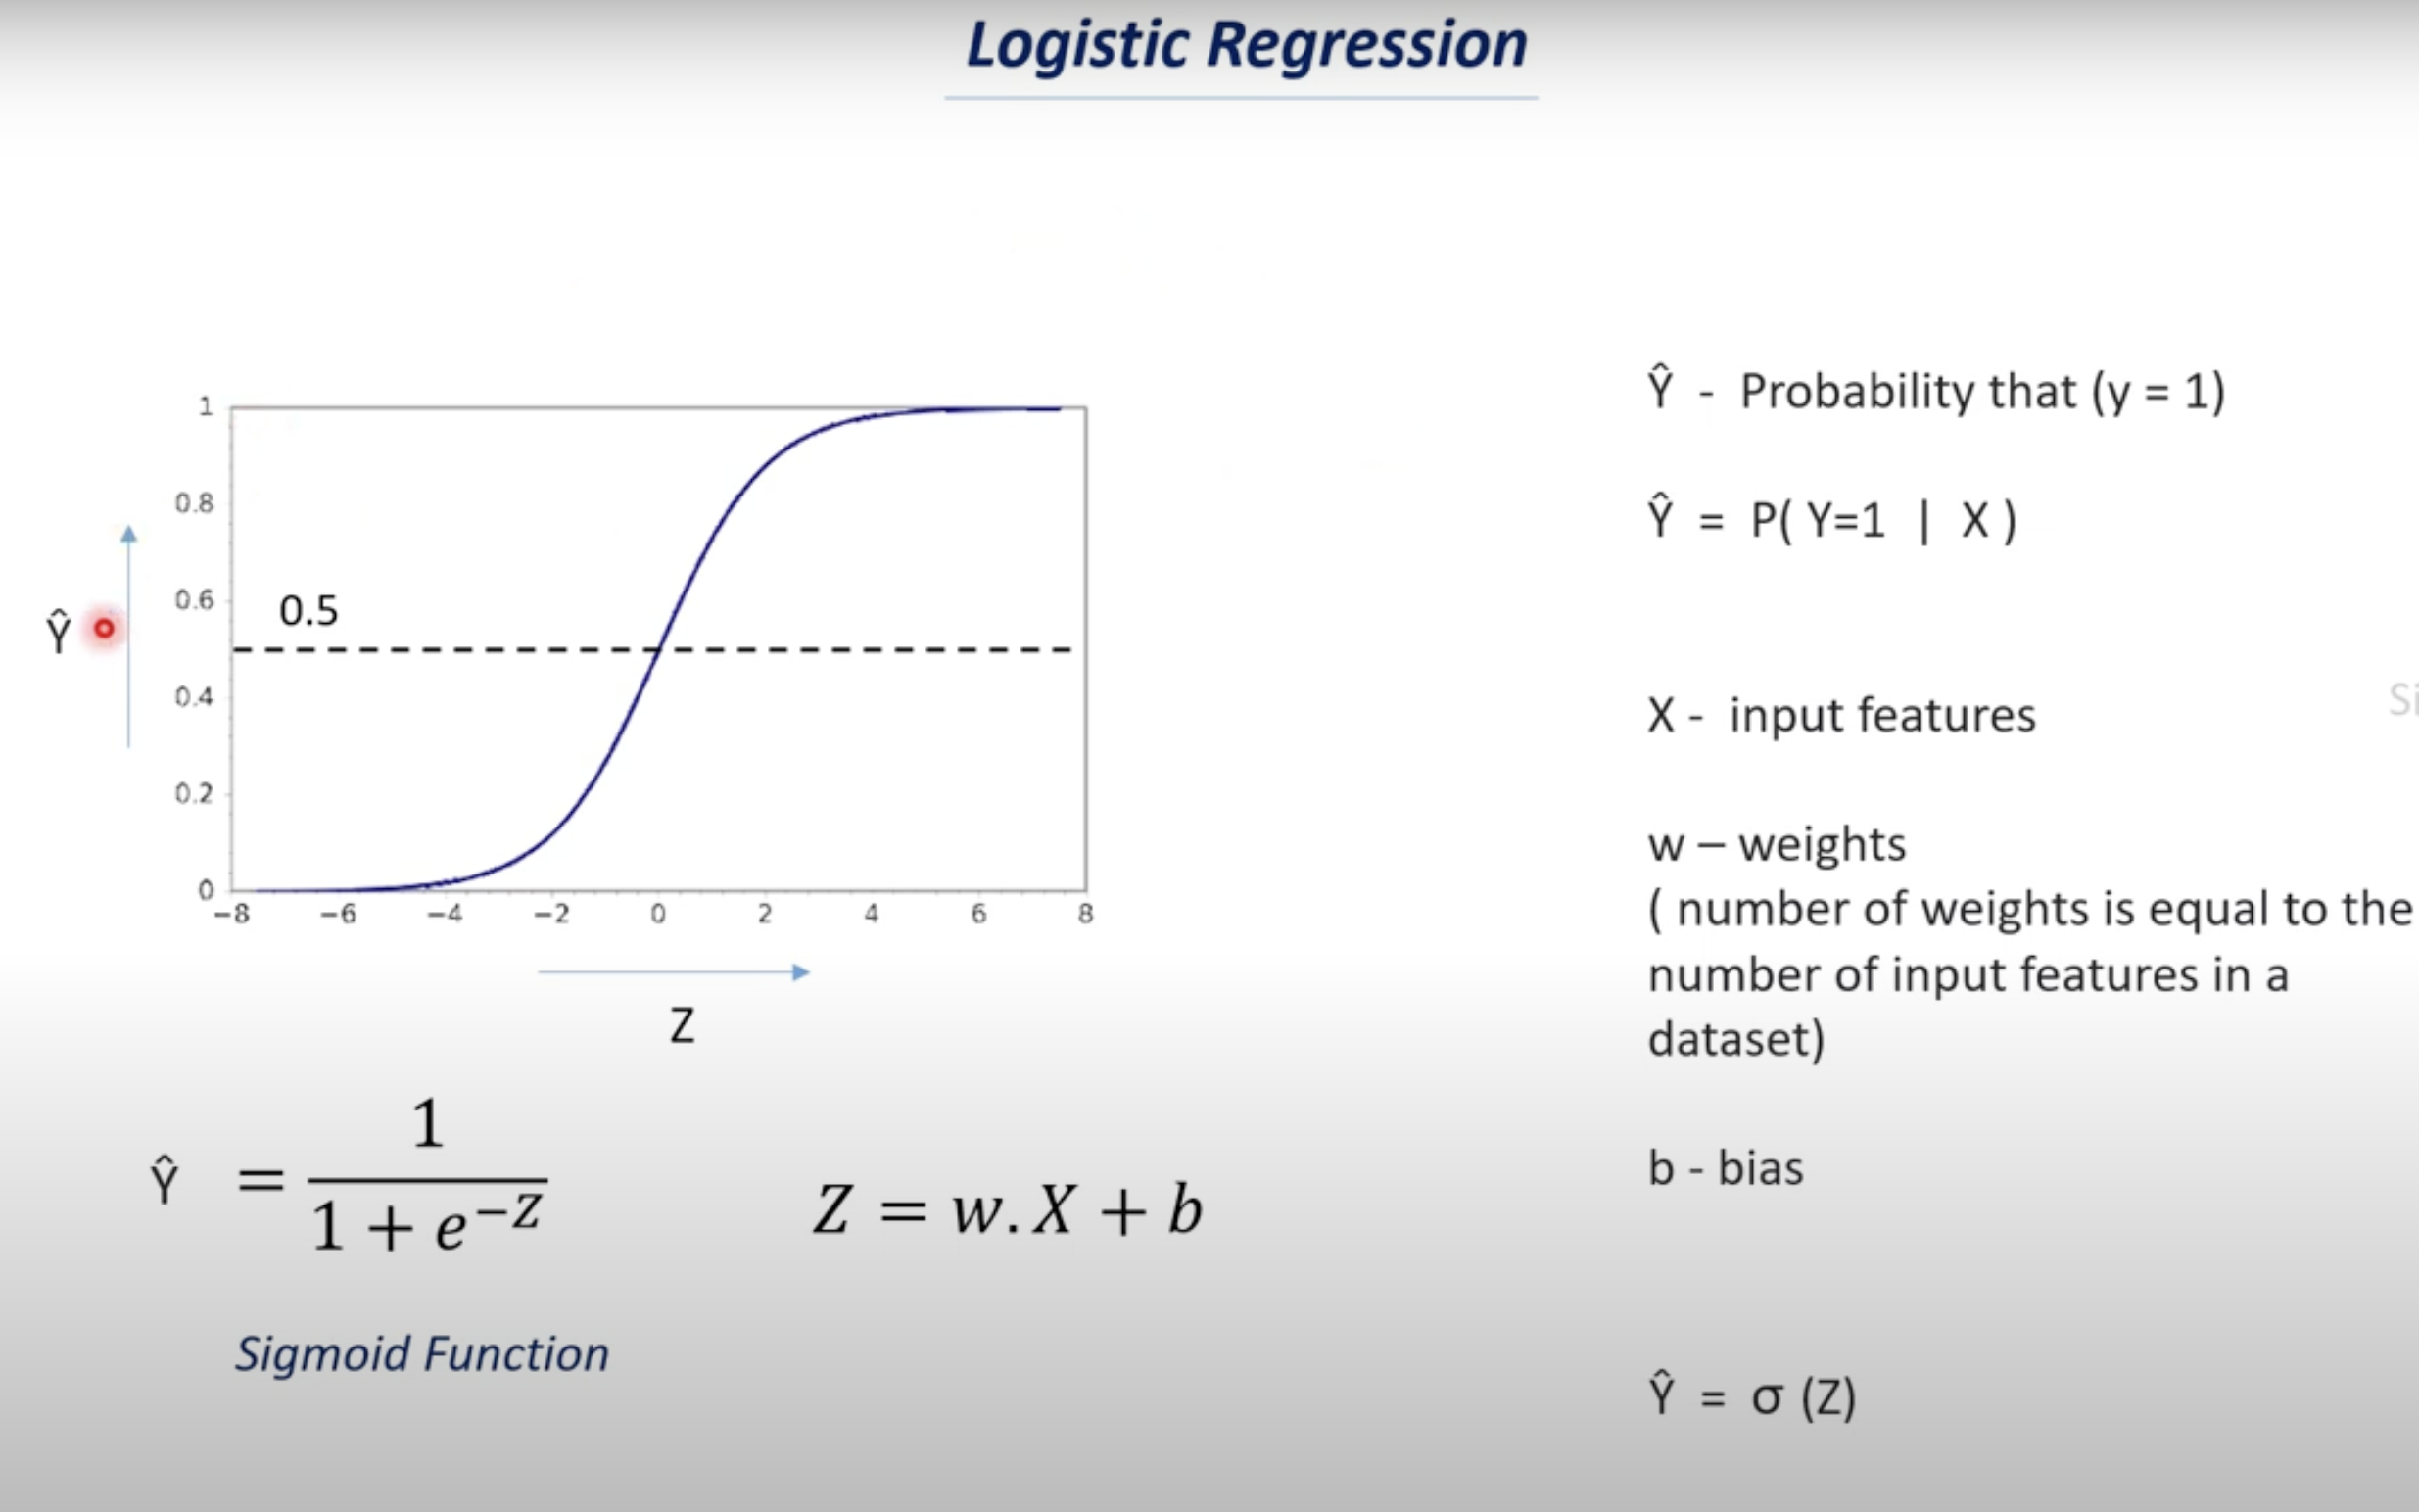

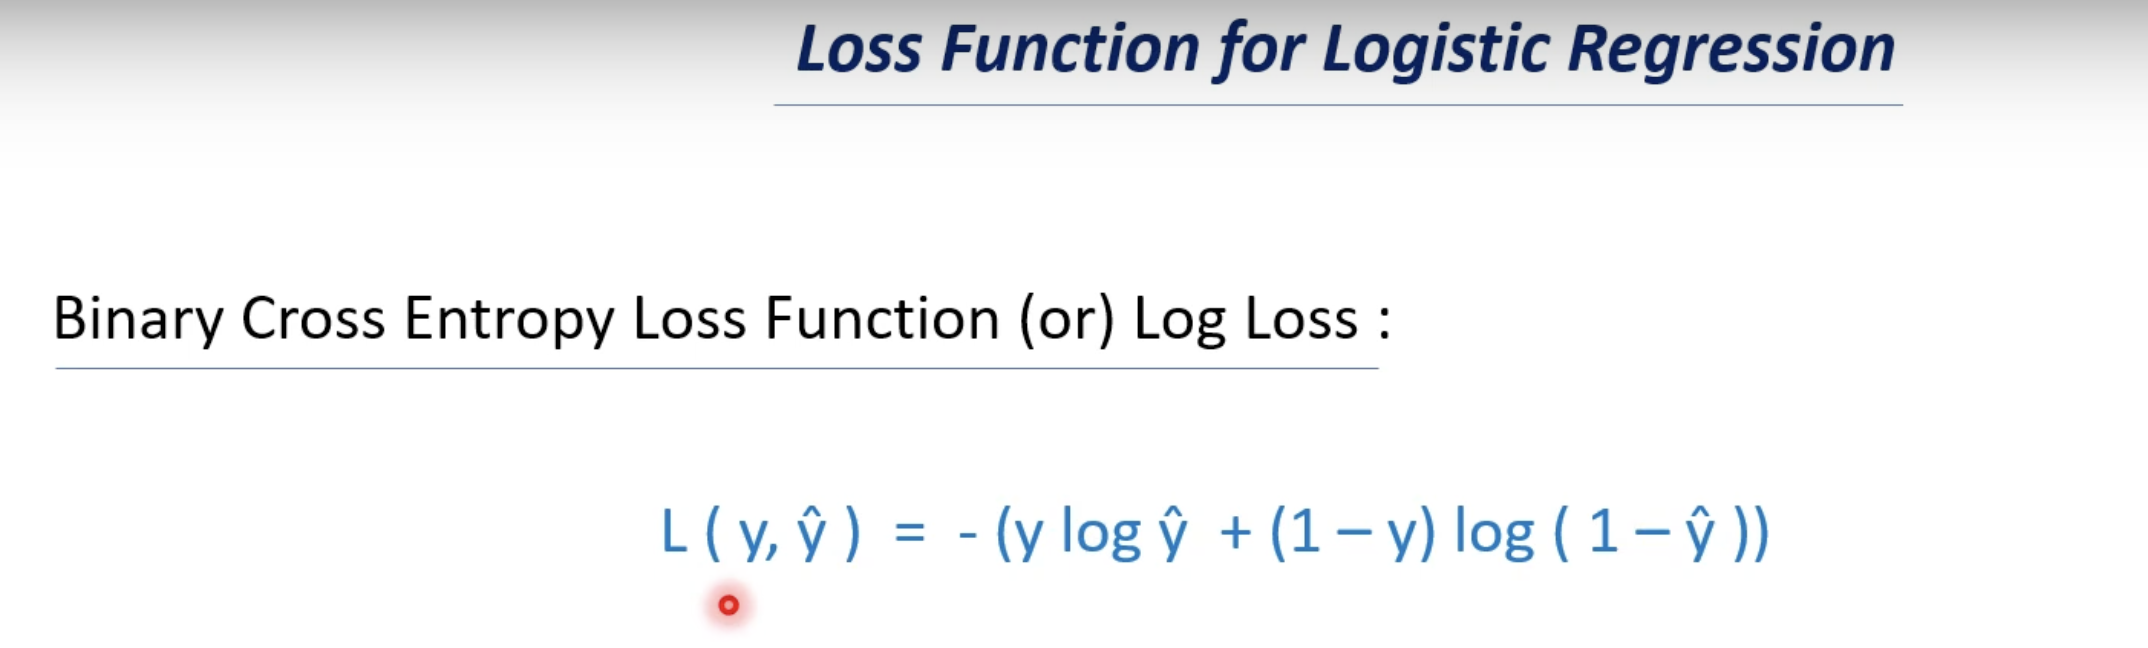

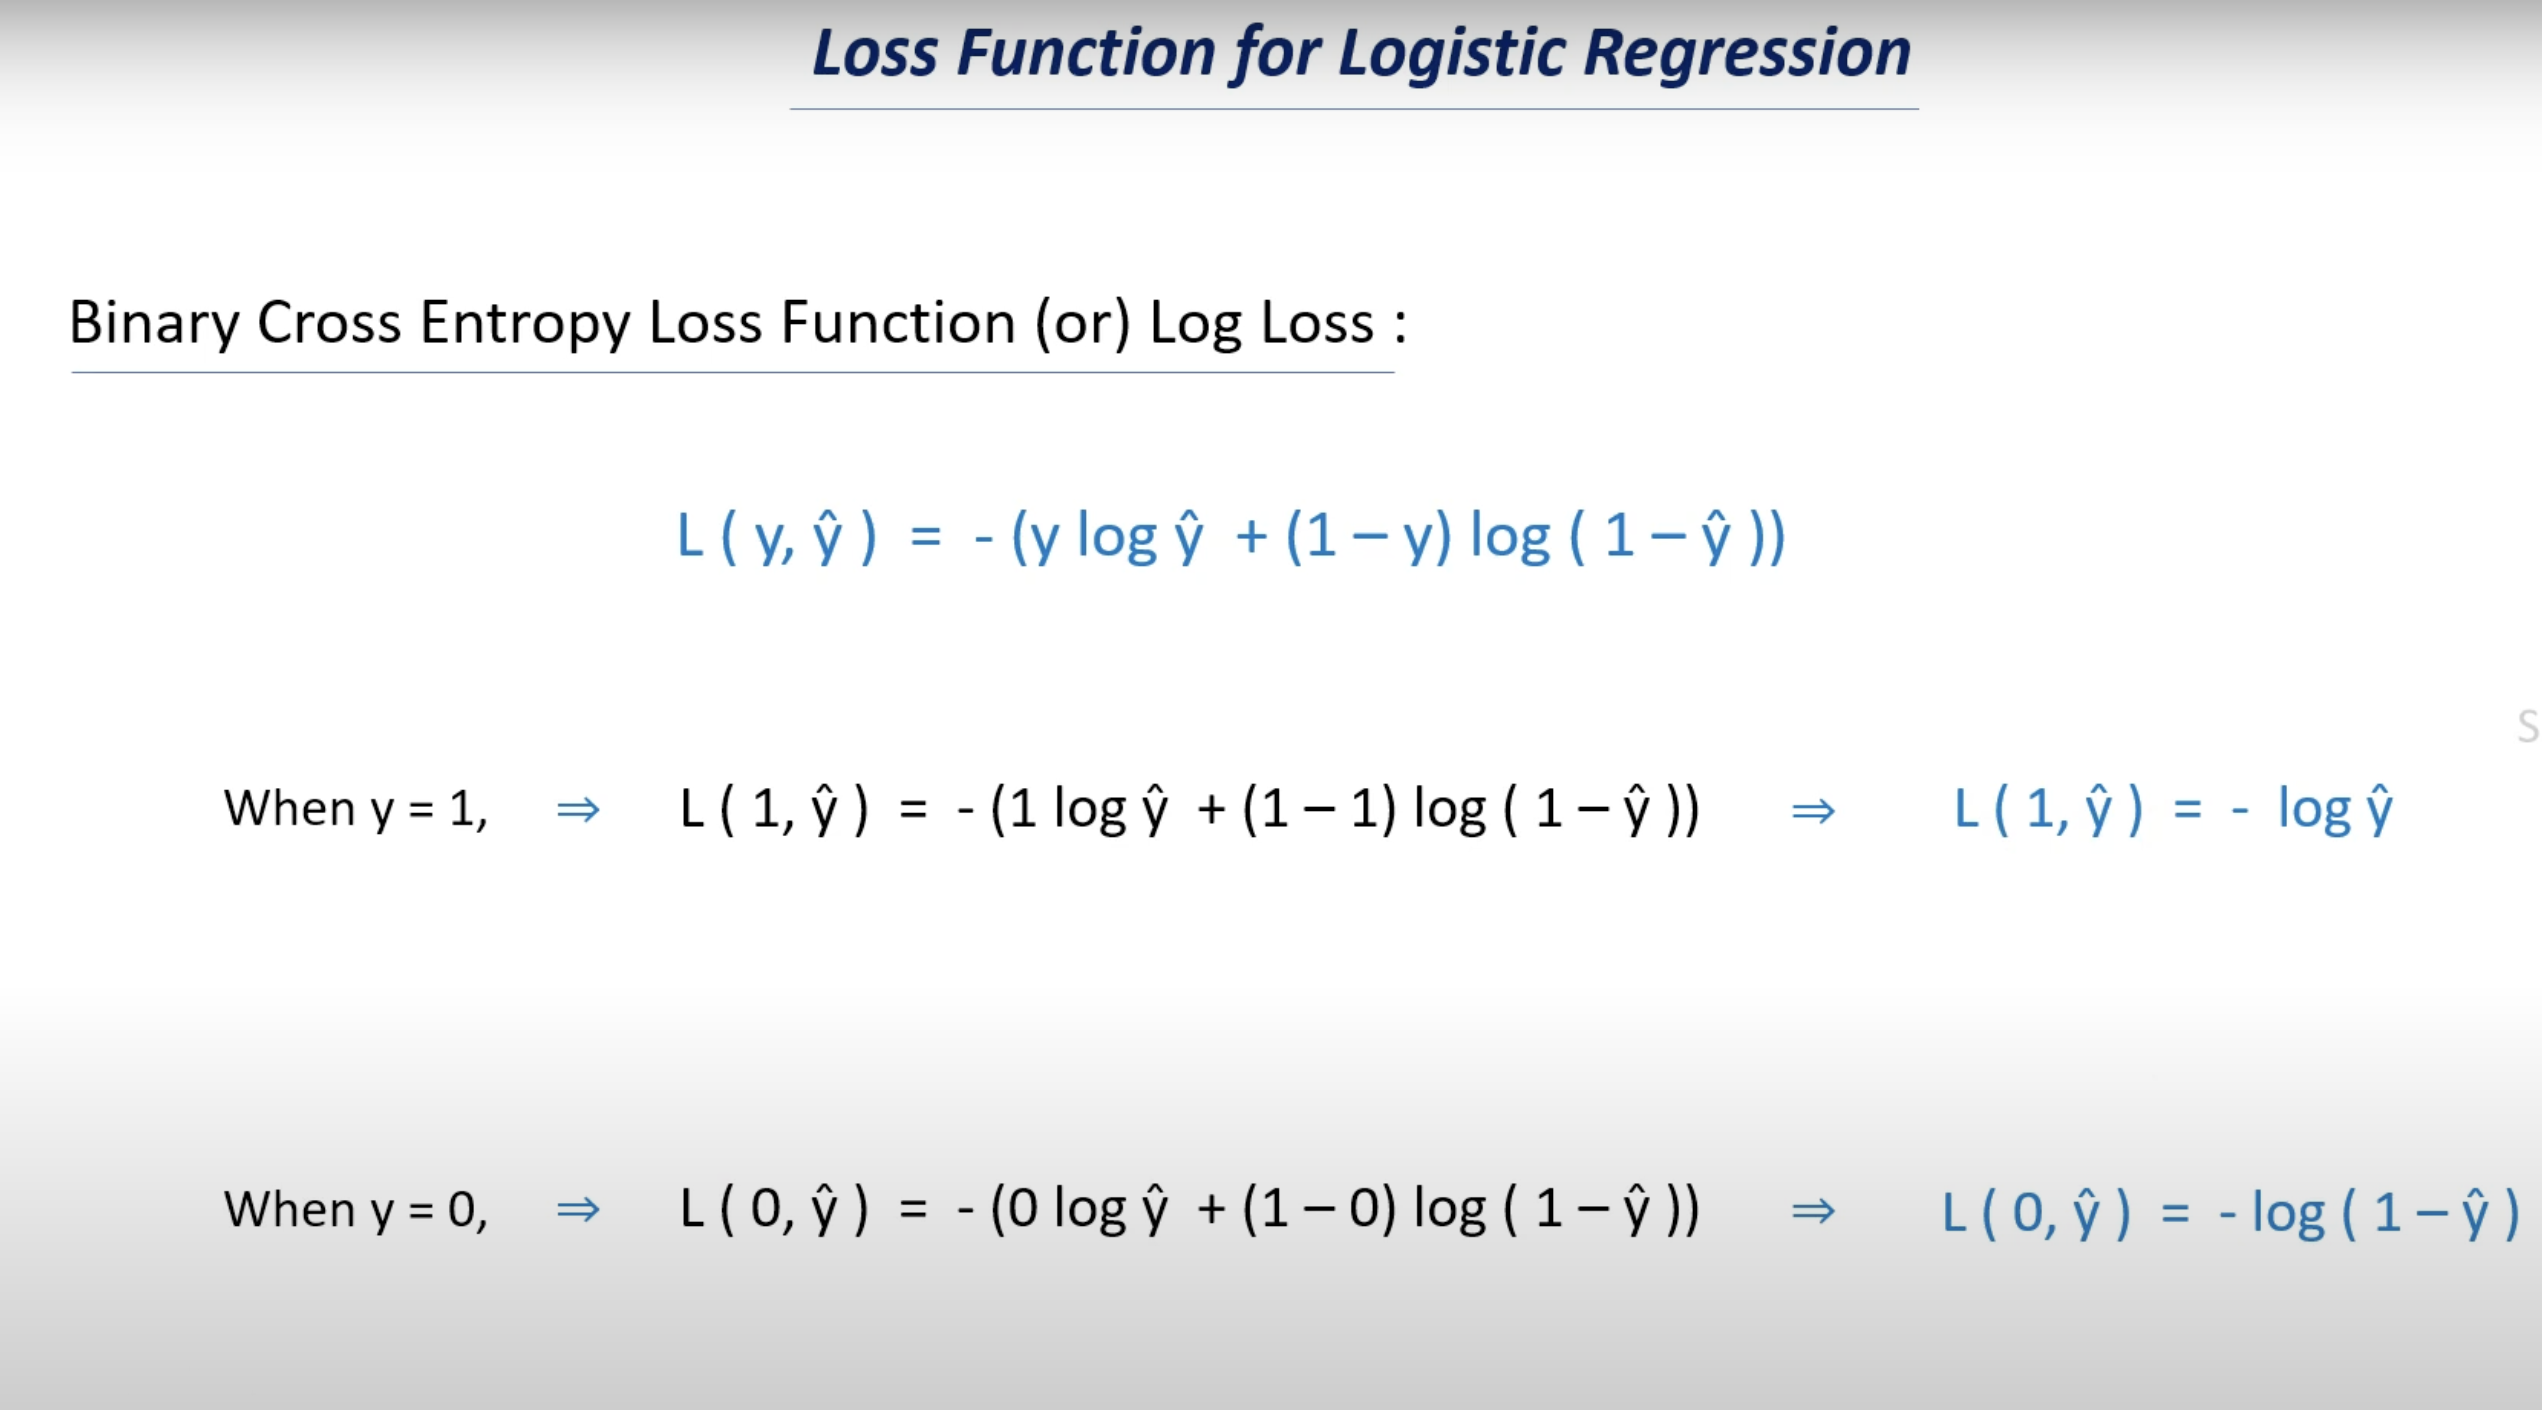

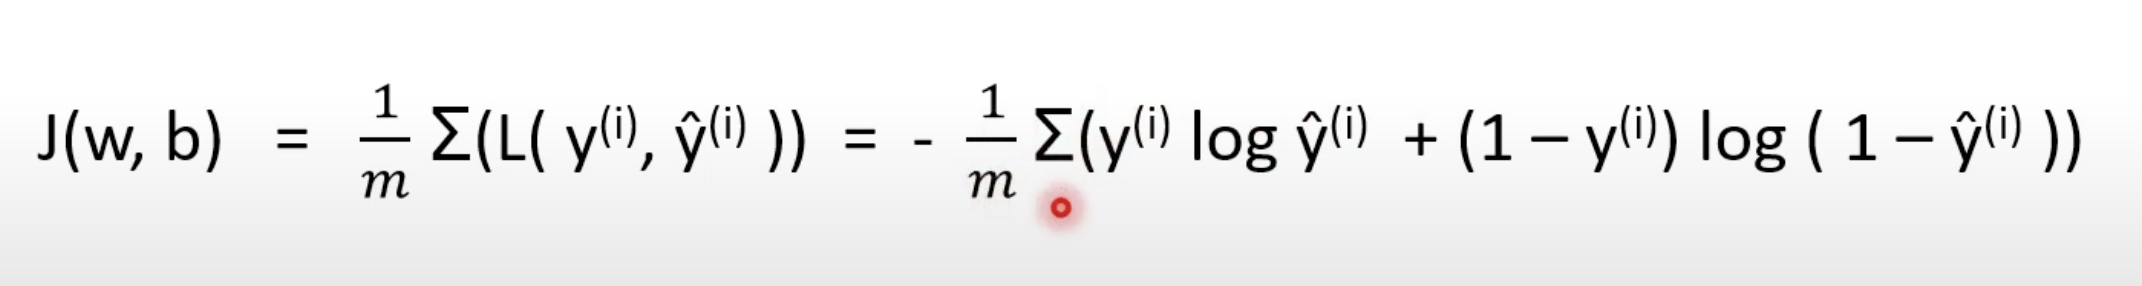

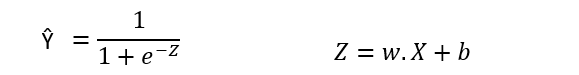

Y_hat --> predicted value

X --> Input Variable

w --> weight

b --> bias

Gradient Descent:

Gradient Descent is an optimization algorithm used for minimizing the loss function in various machine learning algorithms. It is used for updating the parameters of the learning model.

w = w - α*dw

b = b - α*db

Learning Rate:

Learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.

Derivatives:
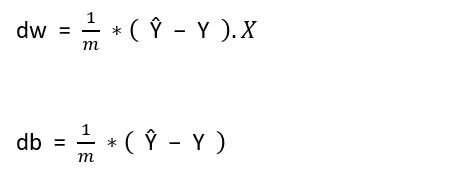

In [48]:
import numpy as np

In [49]:
class Logistic_Regression():
  def __init__(self,learning_rate,no_of_iterations):
    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations

  def fit(self,X,Y):
    # number of data points in the dataset (number of rows)  -->  m
    # number of input features in the dataset (number of columns)  --> n
    self.m,self.n=X.shape
    self.w=np.zeros(self.n)
    self.b=0
    self.X=X
    self.Y=Y

    for i in range(self.no_of_iterations):
      self.update_weights()

  def update_weights(self):
    # Y_hat formula (sigmoid function)
    Y_hat = 1 / (1 + np.exp( - (self.X.dot(self.w) + self.b ) ))
    # gradients formula
    dw = (1/self.m)*np.dot(self.X.T,(Y_hat - self.Y))
    db = (1/self.m)*np.sum(Y_hat - self.Y)

    self.w = self.w - self.learning_rate * dw
    self.b = self.b - self.learning_rate * db

  def predict(self,X):
    y_pred = 1 / (1 + np.exp( - (X.dot(self.w) + self.b ) ))
    y_pred = np.where( y_pred > 0.5, 1, 0)
    return y_pred



implementing the abaove class we created

In [50]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets


importing diabetes dataset from sklearn

In [51]:
dataset=pd.read_csv('/content/diabetes.csv')

seperating features and target

In [52]:
features=dataset.drop(columns='Outcome',axis=1)
target=dataset['Outcome']


Standardize the data as the value in each column has varying ranges

In [53]:
scaler=StandardScaler()
std_features=scaler.fit_transform(features)
#std_features.head() wont work because scaler.fit_transform() returns a NumPy array, not a DataFrame.
print(std_features)



[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


splitting the train test data

In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(std_features,target, test_size = 0.2, random_state=2)

In [55]:
print(features.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


loading the class object we created

In [56]:
classifier=Logistic_Regression(learning_rate=0.01,no_of_iterations=1000)

In [57]:
classifier.fit(X_train,Y_train)

now we have optimal values of w and b
testing accuracy for test data

In [58]:
#testing
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score( Y_train, X_train_prediction)
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7768729641693811


cheching accuracy for test data now

In [59]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score( Y_test, X_test_prediction)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7662337662337663


Data visualization
A correlation heatmap is a color-coded grid that shows how strongly and in what direction pairs of features (columns) in a dataset are related.

It helps answer questions like:

Which features are positively or negatively correlated with the target (Outcome)?

Are there features that are highly correlated with each other (and might be redundant)?

What are the strongest predictors of diabetes?

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

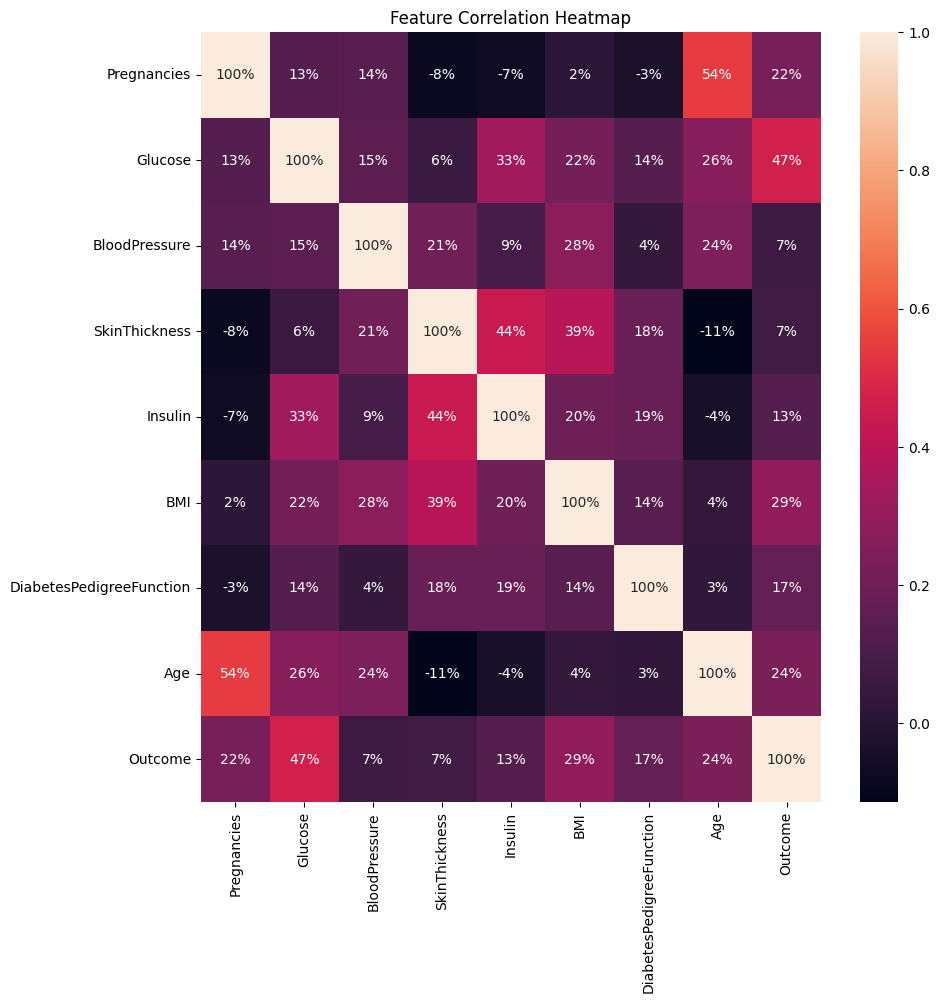

In [61]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(),annot=True,fmt='.0%')
plt.title("Feature Correlation Heatmap")
plt.show()

| Feature                                    | Correlation with Outcome | Interpretation                                 |
| ------------------------------------------ | ------------------------ | ---------------------------------------------- |
| **Glucose**                                | **0.47**                 | ✅ Strongest positive correlation with diabetes |
| **BMI**                                    | **0.29**                 | 🟢 Moderate correlation                        |
| **Age**                                    | **0.24**                 | 🟡 Slight correlation                          |
| **Pregnancies**                            | **0.22**                 | 🟡 Slight correlation                          |
| Insulin                                    | 0.13                     | Weak correlation                               |
| Others (e.g. SkinThickness, BloodPressure) | < 0.1                    | Negligible correlation                         |
